# Import Library

In [1]:
import pandas as pd
import joblib
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load Data

In [2]:
url = "https://raw.githubusercontent.com/RyanRizaldy/StuntTrack/main/capstoneProject/ML/dataset/data_balita_balanced.csv"
dataset= pd.read_csv(url)
dataset

,Umur,Jenis_Kelamin,Tinggi_Badan,Status_Gizi
0,0,1,47.598436,2
1,40,0,99.900000,2
2,57,1,107.300000,2
3,58,0,110.300000,2
4,25,0,83.400000,2
...,...,...,...,...
22323,60,0,92.700000,0
22324,60,0,92.300000,0
22325,60,0,95.200000,1
22326,60,0,126.200000,3


# Pisahin fitur dan target

In [3]:
# Separate features (X) and target (y)
X = dataset[['Umur', 'Jenis_Kelamin', 'Tinggi_Badan']]
y = dataset['Status_Gizi']

# Normalisasi

In [4]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Simpan Scaler

In [5]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Split data

In [6]:
# Split data training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Modeling

In [7]:
model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),  # Hidden layer pertama
    Dense(16, activation='relu'),                                  # Hidden layer kedua
    Dense(4, activation='softmax')                                 # Output layer (4 kelas)
])

c:\Users\Azmi Azis\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Latih Model

In [10]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4650 - loss: 1.2554 - val_accuracy: 0.6592 - val_loss: 0.8075
Epoch 2/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.6913 - loss: 0.7524 - val_accuracy: 0.7376 - val_loss: 0.6887
Epoch 3/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.7517 - loss: 0.6492 - val_accuracy: 0.7949 - val_loss: 0.6101
Epoch 4/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.8086 - loss: 0.5692 - val_accuracy: 0.8549 - val_loss: 0.5222
Epoch 5/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8557 - loss: 0.4895 - val_accuracy: 0.8710 - val_loss: 0.4458
Epoch 6/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.8800 - loss: 0.4135 - val_accuracy: 0.8849 - val_loss: 0.3851
Epoch 7/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.8908 - loss: 0.3576 - val_accuracy: 0.8912 - val_loss: 0.3382
Epoch 8/100
559/559 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.8993 - loss: 0.3

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,214 (4.75 KB)

 Trainable params: 404 (1.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 810 (3.17 KB)

# Test akurasi

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Loss pada data test: {test_loss}")
print(f"Akurasi pada data test: {test_accuracy}")


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.9758 - loss: 0.0689
Loss pada data test: 0.06991622596979141
Akurasi pada data test: 0.9758172631263733


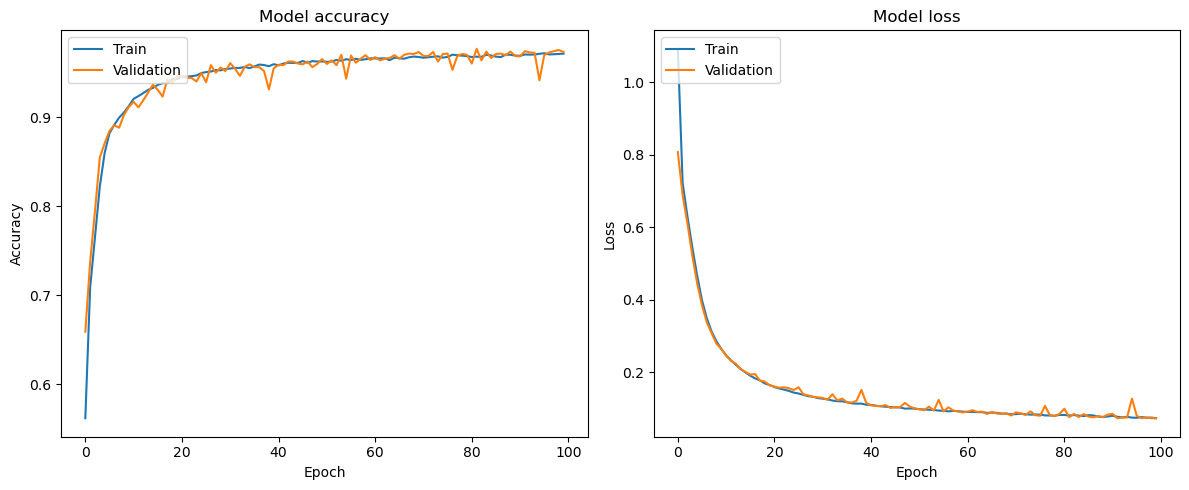

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Load Model dan scaler

In [15]:
# simpan model yang sudah di training
model.save('mlp_model.h5')

# Load scaler yang udh disimpan
scaler = joblib.load('scaler.pkl')

# Load model yang sudah di training
from tensorflow.keras.models import load_model
trained_model = load_model('mlp_model.h5')

# Tes Model dengan data baru

In [ ]:
new_data = pd.DataFrame({
    'Umur': [10],  #data usia (bulan)
    'Jenis_Kelamin': [1],  # 1 = laki-laki 0 = Perempuan
    'Tinggi_Badan': [98.0]  # tinggi badan (cm)
})

# Normalize data yang baru
new_data_scaled = scaler.transform(new_data)

# Predict data baru masuk ke kelas yang mana
predictions = trained_model.predict(new_data_scaled)

# konvert prediksi ke label kelas
predicted_class = predictions.argmax(axis=1)[0]

# Hasil nya
classes = ['severely_stunted', 'stunted', 'normal', 'tinggi']
print(f"Predicted class: {classes[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted class: severely_stunted
